In [1]:
import argparse
from utils import prepare_save_dir
from STELLAR import STELLAR
import numpy as np
import torch
from datasets import CodexGraphDataset, load_tonsilbe_data, load_hubmap_data
import pandas as pd
import anndata
import scanpy as sc

In [6]:
parser = argparse.ArgumentParser(description='STELLAR')
parser.add_argument('--dataset', default='TonsilBE', help='dataset setting')
parser.add_argument('--seed', type=int, default=1, metavar='S', help='random seed (default: 1)')
parser.add_argument('--name', type=str, default='STELLAR')
parser.add_argument('--epochs', type=int, default=20)
parser.add_argument('--lr', type=float, default=1e-3)
parser.add_argument('--wd', type=float, default=5e-2)
parser.add_argument('--input-dim', type=int, default=44)
parser.add_argument('--num-heads', type=int, default=13)
parser.add_argument('--num-seed-class', type=int, default=3)
parser.add_argument('--sample-rate', type=float, default=0.5)
parser.add_argument('-b', '--batch-size', default=1, type=int,
                metavar='N',
                help='mini-batch size')
parser.add_argument('--distance_thres', default=50, type=int)
parser.add_argument('--savedir', type=str, default='./')
args = parser.parse_args(args=[])
args.cuda = torch.cuda.is_available()
args.device = torch.device("cuda" if args.cuda else "cpu")

In [7]:
labeled_X, labeled_y, unlabeled_X, labeled_edges, unlabeled_edges = load_tonsilbe_data('./data/BE_Tonsil_dryad.csv', './data/granularity_tonsil_eso_4_levels.csv', args.distance_thres, args.sample_rate)
dataset = CodexGraphDataset(labeled_X, labeled_y, unlabeled_X, labeled_edges, unlabeled_edges)

In [8]:
stellar = STELLAR(args, dataset)
stellar.train()
_, results = stellar.pred()

Computing METIS partitioning...
Done!
Loss: 3.836480
Loss: 3.531029
Loss: 3.304482
Loss: 3.121164
Computing METIS partitioning...
Done!
Loss: 1.984900
Loss: 2.066303
Loss: 1.941271
Loss: 1.808585
Computing METIS partitioning...
Done!
Loss: 1.236997
Loss: 1.269807
Loss: 1.193943
Loss: 1.114564
Computing METIS partitioning...
Done!
Loss: 0.979137
Loss: 0.786222
Loss: 0.797463
Loss: 0.774372
Computing METIS partitioning...
Done!
Loss: 0.538353
Loss: 0.640631
Loss: 0.620433
Loss: 0.616247
Computing METIS partitioning...
Done!
Loss: 0.636117
Loss: 0.545937
Loss: 0.525196
Loss: 0.523757
Computing METIS partitioning...
Done!
Loss: 0.522900
Loss: 0.480294
Loss: 0.478085
Loss: 0.477122
Computing METIS partitioning...
Done!
Loss: 0.595456
Loss: 0.453510
Loss: 0.445228
Loss: 0.445942
Computing METIS partitioning...
Done!
Loss: 0.403761
Loss: 0.445915
Loss: 0.425029
Loss: 0.422088
Computing METIS partitioning...
Done!
Loss: 0.494954
Loss: 0.438280
Loss: 0.427943
Loss: 0.430006
Computing METIS part

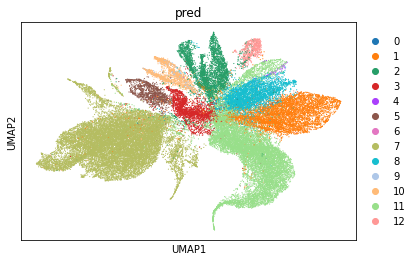

In [10]:
adata = anndata.AnnData(unlabeled_X)
adata.obs['pred'] = pd.Categorical(results)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['pred'], size=5)